In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import sys
sys.path.append('c:/users/shubh/programming_work/virtual_envs/genai_exp_env/lib/site-packages')


In [3]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


In [4]:
df_final_aggregated = pd.read_csv("df_final_aggregated.csv")

In [5]:
comment_categories = [

    "Humor and Memes",
    "Appreciation and Praise",
    "Words of empathy",
    "Personal Stories and Experiences"    
]

In [6]:
lyric_categories = [

    "Love and Relationships",
    "Self-Reflection and Personal Struggles",
    "Social and Political Themes",
    "Celebration and Fun",
    "Philosophical and Existential",
    "Storytelling and Narrative",
    "Escape and Fantasy",
    "Spiritual and Relgious",
    "Cultural and Lifestyle",
    "Fun and Humor"
]

In [7]:
spotify_attributes = [
    # "spotify_id",
    "Danceability",	
    "Energy",	
    "Key",	
    "Loudness",	
    "Speechiness",	
    "Acousticness",	
    "Instrumentalness",	
    "Liveness",	
    "Valence",	
    "Tempo",	
    "Duration_ms"

    
]

In [8]:
for col in df_final_aggregated.columns:
    print(col)

Unnamed: 0
spotify_id
Love and Relationships
Self-Reflection and Personal Struggles
Social and Political Themes
Celebration and Fun
Philosophical and Existential
Storytelling and Narrative
Escape and Fantasy
Spiritual and Religious
Cultural and Lifestyle
Fun and Humor
Humor and Memes
Appreciation and Praise
Words of encouragement
Words of empathy
Personal Stories and Experiences
Nostalgia and Memories
Artist
Url_spotify
Track
Album
Album_type
Uri
Danceability
Energy
Key
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
Url_youtube
Title
id
lyrics
youtube_video_id
video_id


In [9]:
X = df_final_aggregated[ comment_categories ]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

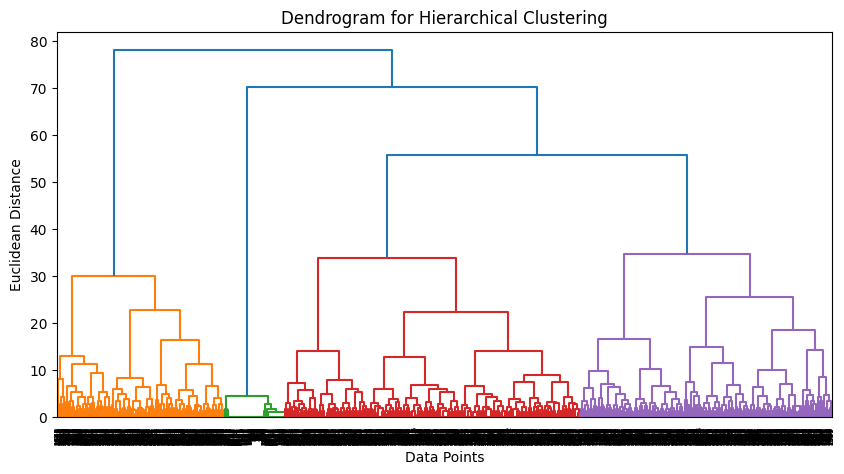

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Assume X_scaled is the preprocessed data

# Plot Dendrogram to determine optimal clusters
plt.figure(figsize=(10, 5))
linkage_matrix = sch.linkage(X_scaled, method='ward')
sch.dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()



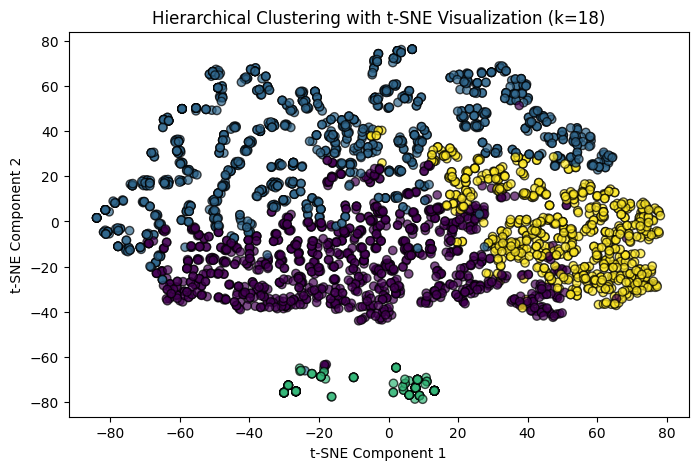

In [12]:
# Perform Hierarchical Clustering with k=18
n_clusters = 4
agglo = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = agglo.fit_predict(X_scaled)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the clustered data using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Hierarchical Clustering with t-SNE Visualization (k=18)')
plt.show()

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, columns = comment_categories )
X_scaled_df['cluster'] = labels

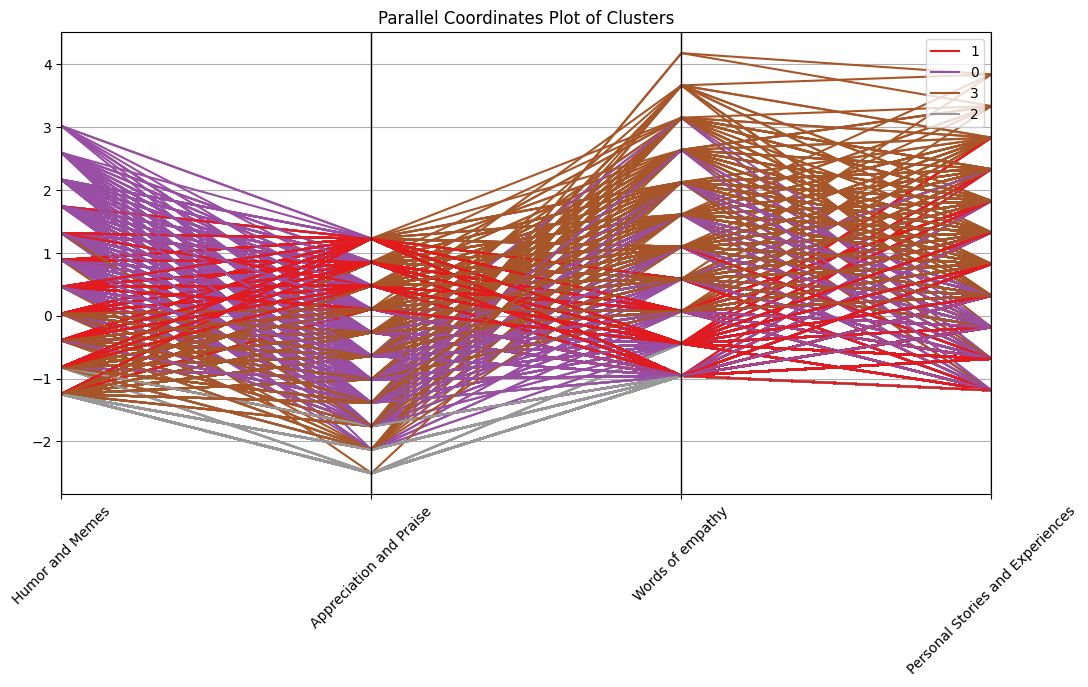

In [15]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
parallel_coordinates(X_scaled_df, class_column="cluster", cols=comment_categories, colormap=plt.get_cmap("Set1"))
plt.title("Parallel Coordinates Plot of Clusters")
plt.xticks(rotation=45)
plt.show()

In [18]:
len(X_scaled_df[ X_scaled_df['cluster'] == 2 ])

252

C:\Users\shubh\AppData\Local\Temp\ipykernel_2452\3635549033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=X_scaled_df, ax=axes[idx//3, idx%3], palette="Set2")
C:\Users\shubh\AppData\Local\Temp\ipykernel_2452\3635549033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=X_scaled_df, ax=axes[idx//3, idx%3], palette="Set2")
C:\Users\shubh\AppData\Local\Temp\ipykernel_2452\3635549033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=X_scaled_df, ax=ax

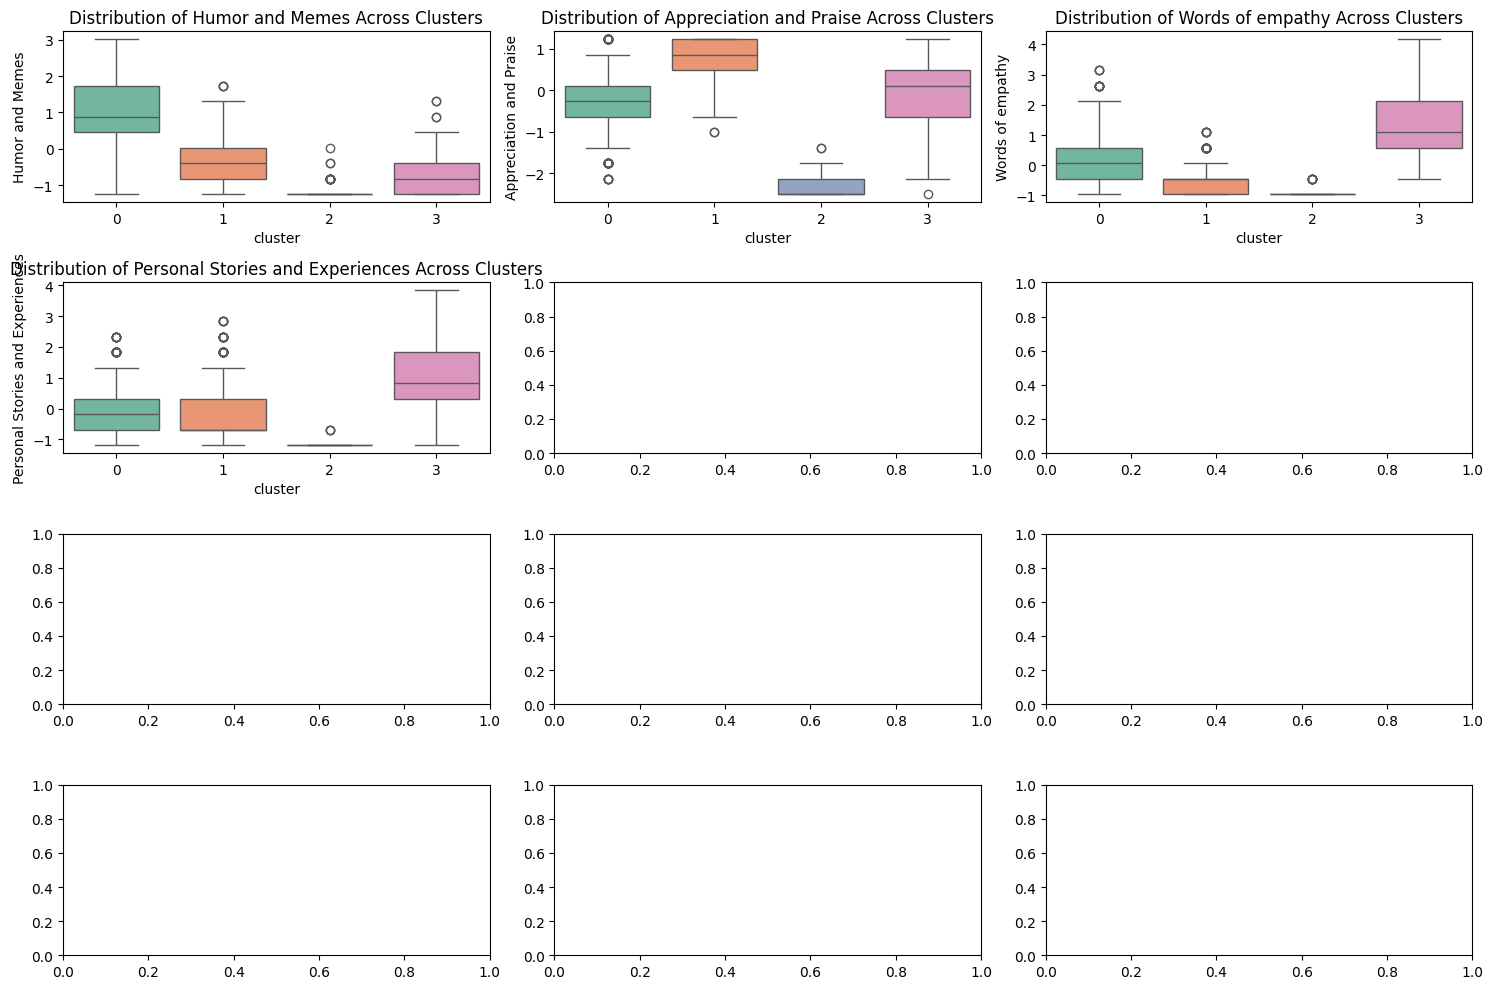

In [22]:
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
for idx, feature in enumerate(comment_categories):  # 상위 6개 feature만 시각화
    sns.boxplot(x="cluster", y=feature, data=X_scaled_df, ax=axes[idx//3, idx%3], palette="Set2")
    axes[idx//3, idx%3].set_title(f"Distribution of {feature} Across Clusters")
plt.tight_layout()
plt.show()